<a href="https://colab.research.google.com/github/Martinmbiro/Pytorch-computer-vision-basics/blob/main/02%20Modelling%20with%20linear%20layers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Modelling with [`Linear`](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html) layers**
> In this notebook, I'll build an Fully Connected Neural Network with linear activations coupled with non-linear activation functions

In [ ]:
# imports
import torch, torchvision, matplotlib.pyplot as plt, torch.nn as nn
import numpy as np
import torch.nn.functional as F
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader

# print torch version
print(f'torch version: {torch.__version__}')
print(f'torchvision version: {torchvision.__version__}')

torch version: 2.5.1+cu121
torchvision version: 0.20.1+cu121


In [ ]:
# set up device
if torch.cuda.is_available():
  device = 'cuda'
elif torch.backends.mps.is_available():
  device = 'mps'
else:
  device = 'cpu'

# show device
device

'cuda'

### Load the data
> But first, we'll have to get the data ready

In [ ]:
def get_data():
  """A function that returns Dataloaders for training set and test set (FashionMNIST)

  Returns
  ---
  train_dl: torch.utils.data.DataLoader
      a DataLoader for train_set

  test_dl: torch.utils.data.DataLoader
      a DataLoader for test_set
  """
  # batch size
  BATCH_SIZE = 32

  train_data = datasets.FashionMNIST(
      root='data',
      train=True,
      download=True,
      transform=ToTensor())

  test_data = datasets.FashionMNIST(
      root='data',
      train=False,
      download=False,
      transform=ToTensor())

  train_dl = DataLoader(
      dataset=train_data, batch_size=BATCH_SIZE,
      shuffle=True)

  test_dl = DataLoader(
      dataset=test_data, batch_size=BATCH_SIZE,
      shuffle=False)

  return train_dl ,test_dl

In [ ]:
# load training and test dataloaders
train_dl, test_dl = get_data()

In [ ]:
# how many batches for each dataloader returned?
len(train_dl), len(test_dl)

(1875, 313)

In [ ]:
# print structure of train_data and test_data
print(train_dl.dataset)
print('\n', test_dl.dataset)

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

 Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()


In [ ]:
# explore one batch
x_tr_bch, y_tr_bch = next(iter(train_dl))
x_tr_bch.shape, y_tr_bch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

In [ ]:
# size of one batch:
len(x_tr_bch), len(y_tr_bch)

(32, 32)

#### Visualize data in random batch
> 🔔 **Note**
+ [`matplotlib.pyplot.subplots`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html#matplotlib-pyplot-subplots) creates a `figure` and a set of subplots, where the subplots are contained in a NumPy [`ndarray`](https://numpy.org/doc/2.1/reference/generated/numpy.ndarray.html).
+ Using [`ndarray.flat`](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.flat.html#numpy-ndarray-flat), the array of subplots can be flattened and iterated over, as if it were a 1-D array

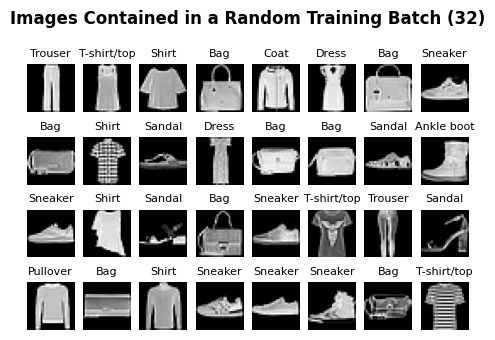

In [ ]:
# create subplot
f, axs = plt.subplots(4, 8, figsize=(4.5,4.5), layout='compressed')

for i, ax in enumerate(axs.flat):
  ax.imshow(x_tr_bch[i].squeeze(), cmap='gray')
  ax.set_title(test_dl.dataset.classes[y_tr_bch[i]],
               fontsize=8)
  ax.axis(False)

f.suptitle('Images Contained in a Random Training Batch (32)',
             weight='black',
             y=0.9) #suptitle position
plt.show()

### Build the neural network
> Here, we'll stack [`nn.Linear`](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html#torch.nn.Linear) layers to build a neural network with `3` hidden layers. We'll also define the loss function and optimizer
+ Additionally, I'll sandwich [`nn.ReLU`](https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html#torch.nn.ReLU) in between the layers for non-linearity
+ The above will be wrapped in a [`nn.Sequential`](https://pytorch.org/docs/stable/generated/torch.nn.Sequential.html#torch.nn.Sequential) container
+ I'll use [`torch.optim.SGD`](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html#torch.optim.SGD) as optimizer and [`torch.nn.CrossEntropyLoss`](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html#crossentropyloss) as loss function

In [ ]:
def get_model(device):
  """Function that returns a model, optimizer and loss function
  Returns
  ---
  model: torch.nn.Module
  optimizer: torch.Optimizer
  loss_fn: torch.nn.Module
  """
  # manual seed
  torch.manual_seed(42)

  # model:
  model = nn.Sequential(
      nn.Flatten(),
      nn.Linear(in_features=784, out_features=16),
      nn.ReLU(),
      nn.Linear(16, 16),
      nn.ReLU(),
      nn.Linear(16, 16),
      nn.ReLU(),
      nn.Linear(16, 10)
  ).to(device)

  # optimizer
  '''opt = torch.optim.Adam(
      params=model.parameters(),
      lr = 0.005
  )'''

  opt = torch.optim.SGD(
      params=model.parameters(),
      lr = 0.05
  )

  # loss function
  loss_fn = nn.CrossEntropyLoss()

  return model, opt, loss_fn

In [ ]:
# get model, optmizer, loss function
model, opt, loss_fn = get_model(device)

#### Visualize structure of neural network
> We'll do this using the [`torchinfo`](https://github.com/TylerYep/torchinfo) library

In [ ]:
!pip install torchinfo
from torchinfo import summary

In [ ]:
# summary of neural network
summary(model=model, input_size=(1, 1, 28, 28))

Layer (type:depth-idx)                   Output Shape              Param #
Sequential                               [1, 10]                   --
├─Flatten: 1-1                           [1, 784]                  --
├─Linear: 1-2                            [1, 16]                   12,560
├─ReLU: 1-3                              [1, 16]                   --
├─Linear: 1-4                            [1, 16]                   272
├─ReLU: 1-5                              [1, 16]                   --
├─Linear: 1-6                            [1, 16]                   272
├─ReLU: 1-7                              [1, 16]                   --
├─Linear: 1-8                            [1, 10]                   170
Total params: 13,274
Trainable params: 13,274
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 0.01
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.05
Estimated Total Size (MB): 0.06

### Early stopping
> 💎 **Pro Tip**

> [Early stopping](https://www.linkedin.com/advice/1/what-benefits-drawbacks-early-stopping#:~:text=Early%20stopping%20is%20a%20form,to%20increase%20or%20stops%20improving.) is a mechanism of stopping training when the validation loss stops improving; with a view to preventing _overfitting_ on the training data
+ Here, we'll create a class to take care of _early-stopping_

In [ ]:
# define a class for early stopping
from copy import deepcopy

class EarlyStopping:
  '''
    patience -> the number of epochs to wait after the last improvement
                before stopping

    counter -> how many epochs have passed since the last improvement

    min_delta -> how much of a difference in loss is to be considered
          worthy to continue training
  '''
  def __init__(self, score_type:str, min_delta:float=0.0, patience:int=5):
    self.counter = 0
    self.patience = patience
    self.min_delta = min_delta
    self.score_type = score_type
    self.best_epoch = None
    self.best_score = None
    self.best_state_dict = None
    self.stop_early = False

    if (self.score_type != 'metric') and (self.score_type != 'loss'):
      err_msg = 'score_type can only be "metric" or "loss"'
      raise Exception(err_msg)

  def __call__(self, model:nn.Module, ep:int, ts_score:float):
    if self.best_epoch is None: # for first time:
      self.best_epoch = ep # store current epoch
      self.best_score = ts_score # store current loss as best loss
      # make a copy of current model's state_dict
      self.best_state_dict = deepcopy(model.state_dict())

    # if previous loss - current loss exceeds min_delta: (for loss function)
    elif (self.best_score - ts_score >= self.min_delta) and (self.score_type == 'loss'):
      self.best_epoch = ep # store current epoch
      self.best_score = ts_score # store current loss as best
      # make a copy of current model's state_dict
      self.best_state_dict = deepcopy(model.state_dict())
      self.counter = 0 # restore counter to zero

    # if current metric - previous. metric exceeds min_delta: (for metric)
    elif (ts_score - self.best_score >= self.min_delta) and (self.score_type == 'metric'):
      self.best_epoch = ep # store current epoch
      self.best_score = ts_score # store current loss as best
      # make a copy of current model's state_dict
      self.best_state_dict = deepcopy(model.state_dict())
      self.counter = 0 # restore counter to zero

    else: # otherwise
      self.counter += 1 # increment counter each time
      if self.counter >= self.patience:
        self.stop_early = True


In [ ]:
# initialize early stopping class
est = EarlyStopping(score_type='metric', patience=3)

### Model training
> First, I'll define functions for training and testing batches, then I'll run an optimization loop

In [ ]:
from sklearn.metrics import f1_score, accuracy_score

# function for model training
def train_batches(model:nn.Module, train_dl:torch.utils.data.DataLoader,
                optimizer:torch.optim.Optimizer, device):
  """Trains model on all batches of train-set DataLoader and returns average training loss, accuracy and f1_score

  Returns
  ---
  ls: float
    average training loss across all batches of data
  acc: float
    average training accuracy across all batches of data
  f1: float
    average training f1_score across all batches of data
  """
  # for reproducability
  torch.manual_seed(0)
  torch.cuda.manual_seed(0)

  ls, acc, f1 = 0, 0, 0
  # train mode
  model.train()
  # loop through each batch in the training DataLoader
  for x, y in train_dl:
    x = x.to(device)
    y = y.to(device)
    # zero gradients
    opt.zero_grad()

    # forward pass
    logits = model(x.to(device))
    y_pred = F.softmax(logits, dim=1).argmax(dim=1).cpu().numpy()

    acc += accuracy_score(y_true=y.cpu().numpy(),
                          y_pred=y_pred)

    f1 += f1_score(y_true=y.cpu().numpy(),
                   y_pred=y_pred, average='macro')


    # loss calculation
    loss = loss_fn(logits, y)
    ls += loss.item()

    # back propagation
    loss.backward()
    # gradient descent
    opt.step()

  # average values
  ls /= len(train_dl)
  acc /= len(train_dl)
  f1 /= len(train_dl)

  return ls, acc, f1

# function for model testing
def test_batches(model:nn.Module, test_dl:torch.utils.data.DataLoader,
                device):
  """Evaluates model on all batches of test-set DataLoader and returns average test loss, accuracy and f1_score

  Returns
  ---
  ls: float
      average test loss across all batches of data
  acc: float
      average test accuracy across all batches of data
  f1: float
      average test f1_score across all batches of data
  """
  ls, acc, f1 = 0, 0, 0
  # eval mode
  model.eval()
  with torch.inference_mode():
    for x, y in test_dl:
      x = x.to(device)
      y = y.to(device)

      # forward pass
      logits = model(x)
      y_pred = F.softmax(logits, dim=1).argmax(dim=1).cpu().numpy()

      acc += accuracy_score(
          y_true=y.cpu().numpy(),
          y_pred=y_pred)

      f1 += f1_score(
          y_true=y.cpu().numpy(),
          y_pred=y_pred, average='macro')

      # loss calculation
      ls += loss_fn(logits, y).item()

  # average values
  ls /= len(test_dl)
  acc /= len(test_dl)
  f1 /= len(test_dl)

  return ls, acc, f1

# a function that returns prediction labels and prediction probabilities
def get_preds_proba(model:torch.nn.Module, test_dl:torch.utils.data.DataLoader):
  """A function that returns y_pred and y_proba from the passed DataLoader

  Parameters
  ---

  model: torch.nn.Module
    A neural network that subclasses torch.nn.Module

  test_dl: torch.utils.data.DataLoader
    A DataLoader for the test dataset

  Returns
  ---
  y_pred:np.ndarray
    A numpy ndarray with prediction labels

  y_proba: np.ndarray
    A numpy ndarray with prediction probabilities
  """
  # get predictions, pred-proba, and convert to numpy array
  with torch.inference_mode():
    pred_list, proba_list = [], []

    model.eval()
    for x, _ in test_dl: # append all prediction tensors into a list
      logits = model.to(device)(x.to(device))

      proba_list.append(F.softmax(logits, dim=1)) # probabilities
      pred_list.append(F.softmax(logits, dim=1).argmax(dim=1)) # predictions

    y_pred = torch.concatenate(pred_list).cpu().numpy()
    y_proba = torch.concatenate(proba_list).cpu().numpy()

  # confirm shape of y_proba and y_pred
  # return y_pred, y_proba
  return y_pred, y_proba

In [ ]:
%%time
# lists to keep progress of training values
train_loss, test_loss, train_acc, test_acc, train_f1, test_f1, ep_list = [],\
    [], [], [], [], [], []
# epochs
epochs = 40

for ep in range(1, epochs+1):
  ep_list.append(ep) # store epoch

  # train
  tr_loss, tr_acc, tr_f1 = train_batches(model, train_dl, opt, device)
  # append the train values returned to respective lists
  train_loss.append(tr_loss), train_acc.append(tr_acc), train_f1.append(tr_f1)

  # test
  ts_loss, ts_acc, ts_f1 = test_batches(model, test_dl, device)
  # append the train values returned to respective lists
  test_loss.append(ts_loss), test_acc.append(ts_acc), test_f1.append(ts_f1)

  # early stopping
  est(model=model, ep=ep, ts_score=ts_acc)
  if est.stop_early:
    break

  if ep%2 == 0:
    print(f'Epoch: {ep}\n----------')
    print(f'Train Loss: {tr_loss:.3f} | Test Loss: {ts_loss:.3f}')
    print(f'Train Accuracy: {tr_acc:.3f} | Test Accuracy: {ts_acc:.3f}')
    print(f'Train F1-Score: {tr_f1:.3f} | Test F1-Score: {ts_f1:.3f}\n')

# print best results
print(f'STOPPED | Best Epoch: {est.best_epoch} | Best Accuracy: {est.best_score:.3f}')

Epoch: 2
----------
Train Loss: 0.523 | Test Loss: 0.559
Train Accuracy: 0.814 | Test Accuracy: 0.802
Train F1-Score: 0.777 | Test F1-Score: 0.757

Epoch: 4
----------
Train Loss: 0.427 | Test Loss: 0.456
Train Accuracy: 0.847 | Test Accuracy: 0.840
Train F1-Score: 0.814 | Test F1-Score: 0.805

Epoch: 6
----------
Train Loss: 0.391 | Test Loss: 0.432
Train Accuracy: 0.859 | Test Accuracy: 0.847
Train F1-Score: 0.829 | Test F1-Score: 0.812

Epoch: 8
----------
Train Loss: 0.369 | Test Loss: 0.428
Train Accuracy: 0.867 | Test Accuracy: 0.850
Train F1-Score: 0.837 | Test F1-Score: 0.816

Epoch: 10
----------
Train Loss: 0.354 | Test Loss: 0.421
Train Accuracy: 0.871 | Test Accuracy: 0.854
Train F1-Score: 0.843 | Test F1-Score: 0.818

Epoch: 12
----------
Train Loss: 0.342 | Test Loss: 0.409
Train Accuracy: 0.876 | Test Accuracy: 0.860
Train F1-Score: 0.848 | Test F1-Score: 0.827

Epoch: 14
----------
Train Loss: 0.333 | Test Loss: 0.426
Train Accuracy: 0.879 | Test Accuracy: 0.854
Train F

In [ ]:
# overwrite the model parameters with best parameters
model.load_state_dict(est.best_state_dict)

<All keys matched successfully>

In [ ]:
# get prediction labels and probabilities
y_pred, y_proba = get_preds_proba(model, test_dl)

# confirm the size of both
y_pred.shape, y_proba.shape

((10000,), (10000, 10))

### Model evaluation
> Here, I'll evaluate the model by plotting results from the optimization loop, as well as evaluating it on basis of classification metrics  

> ✋ **Info**
+ I'll be using [`scikit-learn`](https://scikit-learn.org/stable/index.html) [classification metrics](https://scikit-learn.org/stable/api/sklearn.metrics.html#classification-metrics)

#### Define custom evaluation functions

In [ ]:
# function to plot train and test results
def plot_train_results(ep_list:list, train_score:list, test_score:list,
                       ylabel, title:str, best_epoch:None):
  """A function that plots train and test results against each other
  """
  f, ax = plt.subplots(figsize=(5, 3), layout='constrained')

  # train loss
  ax.plot(ep_list, train_score, label='Training',
          linewidth=1.7, color='#0047ab')

  # test loss
  ax.plot(ep_list, test_score, label='Validation',
          linewidth=1.7, color='#990000')
  # vertical line (for early stopping)
  if best_epoch is not None:
    ax.axvline(best_epoch, linestyle='--', color='#000000', linewidth=1.0,
             label=f'Best ep ({best_epoch})')

  # axis, title
  ax.set_title(title, weight='black')
  ax.set_ylabel(ylabel)
  ax.set_xlabel('Epoch')
  ax.tick_params(axis='both', labelsize=9)
  plt.grid(color='#e5e4e2')

  # legend
  f.legend(fontsize=9, loc='upper right',
          bbox_to_anchor=(1.28, 0.93),
          fancybox=False)

  plt.show()

In [ ]:
# function to plot confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

def plot_confusion_matrix(y_true:np.ndarray, y_pred:np.ndarray):
  # define figure and plot
  _, ax = plt.subplots(figsize=(4.3,4.3), layout='compressed')
  # plot
  ConfusionMatrixDisplay.from_predictions(
      y_true=y_true,
      y_pred=y_pred, cmap='Blues', colorbar=False, ax=ax)

  # for x and y labels
  ax.set_ylabel('True Labels', weight='black')
  ax.set_xlabel('Predicted Labels', weight='black',
                  color='#dc143c')
  # tick size and position
  ax.xaxis.tick_top()
  ax.xaxis.set_label_position('top')
  ax.tick_params(axis='both', labelsize=9)

  # change annotation font
  for txt in ax.texts:
    txt.set_fontsize(9)

  plt.show()

#### Plot optimization results

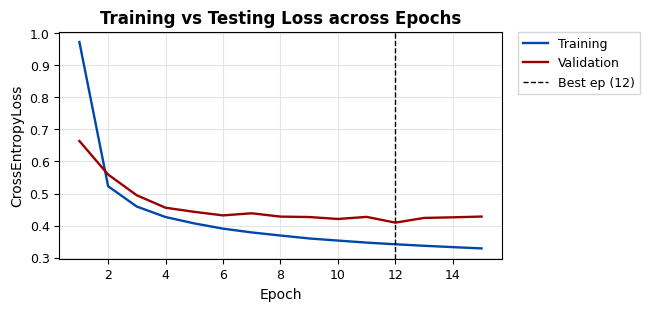

In [ ]:
# training vs testing loss
plot_train_results(ep_list=ep_list, train_score=train_loss, test_score=test_loss,
                   ylabel='CrossEntropyLoss',
                   title='Training vs Testing Loss across Epochs',
                   best_epoch=est.best_epoch)

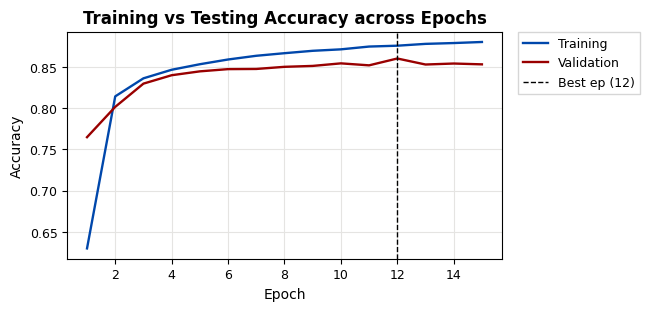

In [ ]:
# training vs testing accuracy
plot_train_results(ep_list=ep_list, train_score=train_acc, test_score=test_acc,
                   ylabel='Accuracy',
                   title='Training vs Testing Accuracy across Epochs',
                   best_epoch=est.best_epoch)

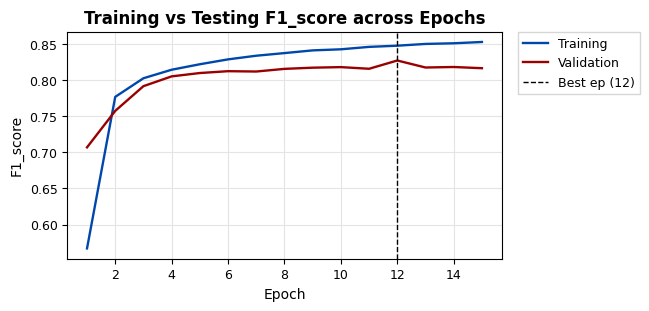

In [ ]:
# training vs testing f1_scores
plot_train_results(ep_list=ep_list, train_score=train_f1, test_score=test_f1,
                   ylabel='F1_score',
                   title='Training vs Testing F1_score across Epochs',
                   best_epoch=est.best_epoch)

#### [`accuracy`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score)

In [ ]:
# compute accuracy
acc = accuracy_score(y_true=test_dl.dataset.targets.cpu().numpy(), #tensor->numpy
                     y_pred=y_pred)
# print
print(f'Model Accuracy: {acc:.3f}')

Model Accuracy: 0.860


#### [`f1_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score)

In [ ]:
# compute f1_score
f1 = f1_score(y_true=test_dl.dataset.targets.cpu().numpy(), #tensor->numpy
                     y_pred=y_pred, average='macro')
# print
print(f'F1_score: {f1:.3f}')

F1_score: 0.857


#### [`classification_report`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html#sklearn.metrics.classification_report)

In [ ]:
from sklearn.metrics import classification_report
cr = classification_report(y_true=test_dl.dataset.targets.cpu().numpy(), #tensor->numpy
                     y_pred=y_pred)
# print
print(cr)

              precision    recall  f1-score   support

           0       0.75      0.89      0.82      1000
           1       0.99      0.95      0.97      1000
           2       0.79      0.74      0.76      1000
           3       0.86      0.89      0.88      1000
           4       0.70      0.86      0.77      1000
           5       0.95      0.93      0.94      1000
           6       0.77      0.49      0.60      1000
           7       0.92      0.93      0.93      1000
           8       0.97      0.95      0.96      1000
           9       0.93      0.96      0.95      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



#### [`roc_auc_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score)

In [ ]:
from sklearn.metrics import roc_auc_score
# calculate
ras = roc_auc_score(y_true=test_dl.dataset.targets.cpu().numpy(),
                    y_score=y_proba,
                    multi_class='ovr')
# print
print(f'roc_auc_score: {ras:.3f}')

roc_auc_score: 0.987


#### [`confusion_matrix`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay)

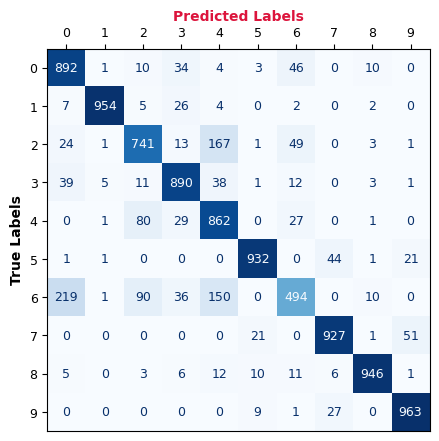

In [ ]:
# plot confusion matrix
plot_confusion_matrix(
    y_true=test_dl.dataset.targets.cpu().numpy(),
    y_pred=y_pred)

In [ ]:
# confirm class labels
test_dl.dataset.class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

> ▶️ **Up Next**
+ Modelling with [`nn.Conv2d`](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html#torch.nn.Conv2d)